11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8056 - loss: 0.6261 - val_accuracy: 0.9541 - val_loss: 0.1506
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9442 - loss: 0.1875 - val_accuracy: 0.9643 - val_loss: 0.1174
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.9595 - loss: 0.1341 - val_accuracy: 0.9670 - val_loss: 0.1113
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.9660 - loss: 0.1151 - val_accuracy: 0.9731 - val_loss: 0.0927
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9698 - loss: 0.0970 - val_accuracy: 0.9742 - val_loss: 0.0905
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9739 - loss: 0.0856 - val_accuracy: 0.9752 - val_loss: 0.0874
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9747 - loss: 0.0786 - val_accuracy: 0.9759 - val_loss: 0.0874
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9774 - loss: 0.071

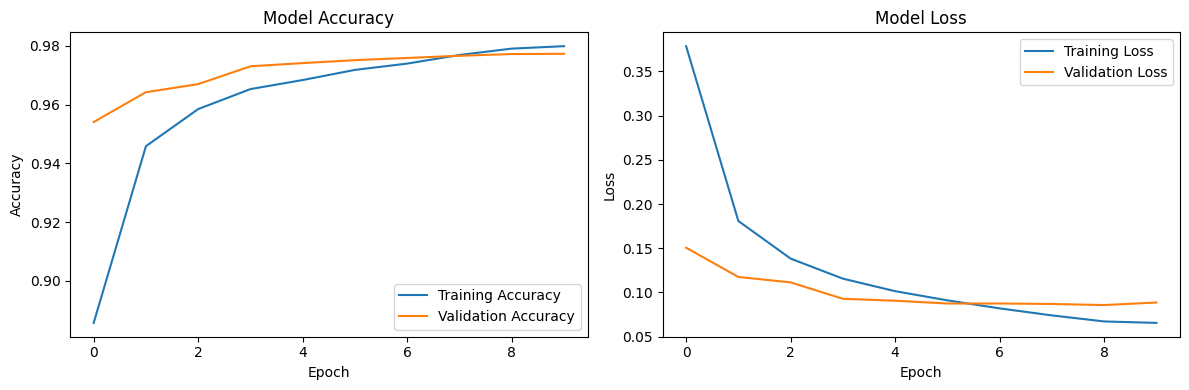

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


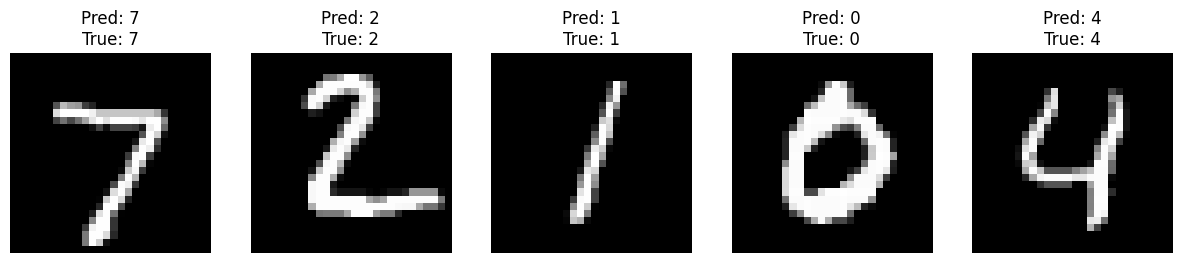

In [1]:

# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Build the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'\nTest accuracy: {test_accuracy:.4f}')

# Visualize training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
# Make predictions and visualize some results
predictions = model.predict(x_test)
num_samples = 5

plt.figure(figsize=(15, 3))
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f'Pred: {np.argmax(predictions[i])}\nTrue: {y_test[i]}')
    plt.axis('off')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


<ipython-input-3-2a5a17cf4ff5>:47: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


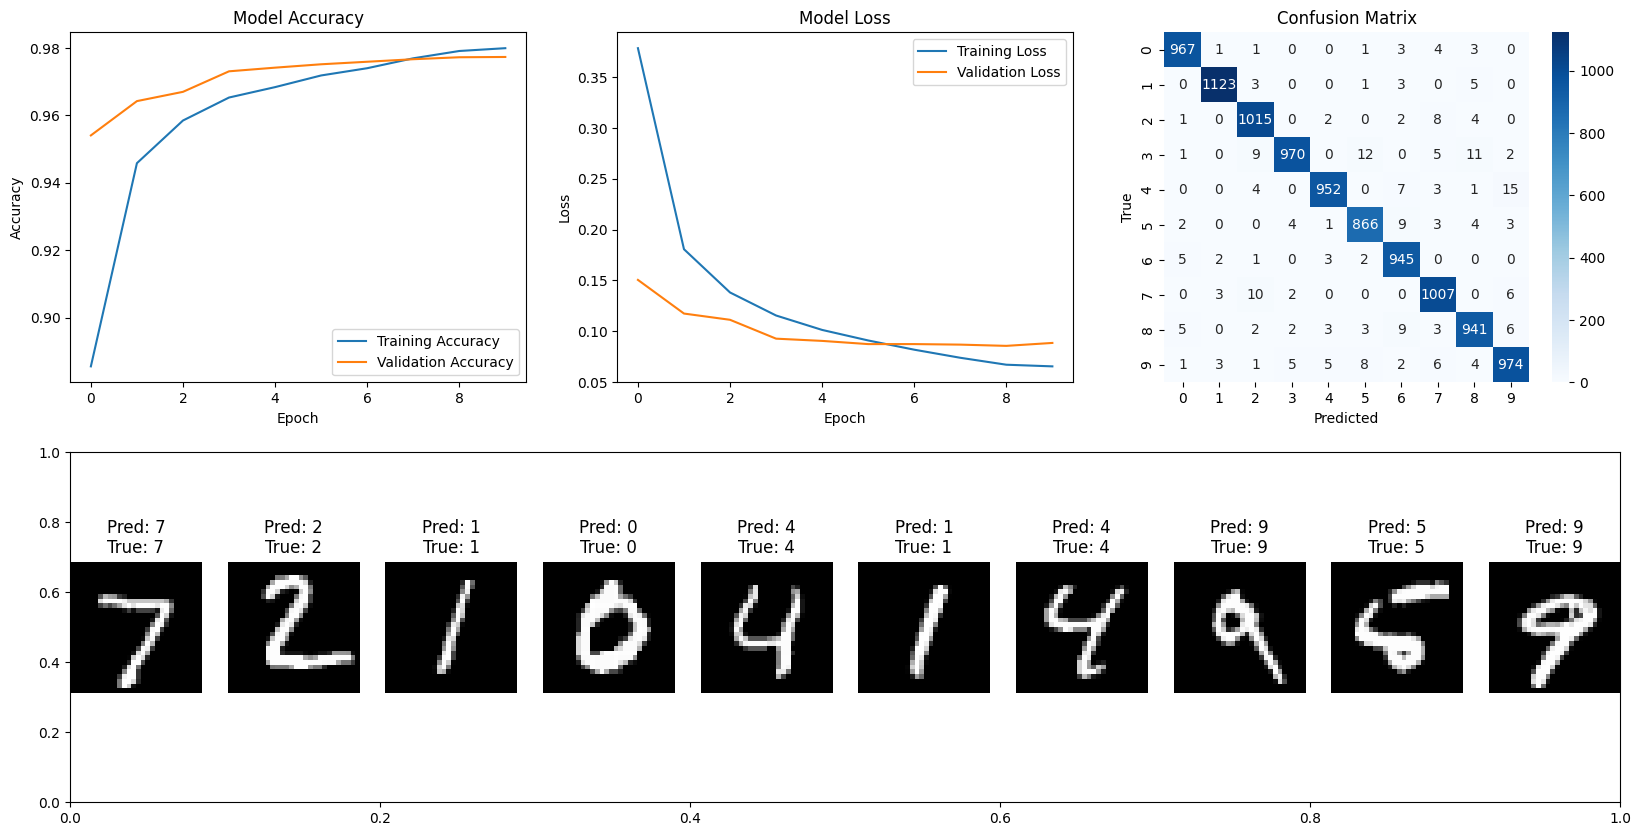


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.99      0.96      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.97      0.97      0.97       892
           6       0.96      0.99      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000


Test Accuracy: 0.9760


In [3]:

# Import additional libraries
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get predictions
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Create figure with subplots
plt.figure(figsize=(20, 10))

# 1. Plot training & validation accuracy
plt.subplot(2, 3, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 2. Plot training & validation loss
plt.subplot(2, 3, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 3. Plot confusion matrix
plt.subplot(2, 3, 3)
cm = confusion_matrix(y_test, predicted_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# 4. Show example predictions
plt.subplot(2, 1, 2)
num_samples = 10
for i in range(num_samples):
    plt.subplot(2, 10, i+11)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f'Pred: {predicted_classes[i]}\nTrue: {y_test[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Print Classification Report
print("\nClassification Report:")
print(classification_report(y_test, predicted_classes))

# Print Overall Test Accuracy
print(f'\nTest Accuracy: {test_accuracy:.4f}')